## Importing the Required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [ ]:
df= pd.read_csv('housing.csv', skipinitialspace=True)
df

# Histogram of the Target Variable

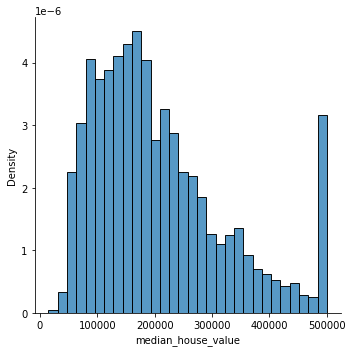

In [ ]:
sns.displot(df, x="median_house_value", bins=30, stat="density")

## Drop categorical columns and columns with missing values

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df= df.drop('ocean_proximity', axis=1)
df= df.drop('total_bedrooms', axis=1)

## View the dimensions of our dataset

In [ ]:
df.shape

(20640, 8)

## Separate into features (X) & target variable (Y)

In [ ]:
X= df.drop('median_house_value', axis=1)

In [ ]:
Y= df['median_house_value']

## Standardize the features

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

## Create Train, Test & Validation Sets

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(14448, 7) (3096, 7) (3096, 7) (14448,) (3096,) (3096,)


# **Building the Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

## Model 1: 1 Input Layer, 2 Hidden Layer, 1 Output Layer


In [ ]:
model = Sequential([
    Dense(15, activation='relu', input_shape=(7,)),
    Dense(15, activation='relu'),
    Dense(1),
])

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=500,
          validation_data=(X_val, Y_val))

## Model Evaluation: MSE & RMSE

In [ ]:
y_pred = model.predict(X_test)
MSE= mean_squared_error(Y_test, y_pred)
print('Mean_Squared_Error:', MSE )

RMSE= np.sqrt(MSE)
print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Mean_Squared_Error: 4570109317.184616


Root_Mean_Squared_Error: 67602.58365761339


## Model 2: 1 Input Layer, 3 Hidden Layers, 1 Output Layer 

In [ ]:
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1),
])

model2.compile(optimizer='adam',
              loss='mean_squared_error')

model2.fit(X_train, Y_train,
          batch_size=32, epochs=500,
          validation_data=(X_val, Y_val))

## Model 2 Evaluation: MSE & RMSE

In [ ]:
y_pred = model2.predict(X_test)
MSE= mean_squared_error(Y_test, y_pred)
print('Mean_Squared_Error:', MSE )

RMSE= np.sqrt(MSE)
print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Mean_Squared_Error: 4139544211.8438497


Root_Mean_Squared_Error: 64339.28979903221


## Model 3: 1 Input Layer, 5 Hidden Layers, 1 Output Layer

In [ ]:
model3 = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1),
])

model3.compile(optimizer='adam',
              loss='mean_squared_error')

model3.fit(X_train, Y_train,
          batch_size=32, epochs=1000,
          validation_data=(X_val, Y_val))

## Model 3 Evaluation: MSE & RMSE

In [ ]:
y_pred = model3.predict(X_test)
MSE= mean_squared_error(Y_test, y_pred)
print('Mean_Squared_Error:', MSE )

RMSE= np.sqrt(MSE)
print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Mean_Squared_Error: 2869039241.0063443


Root_Mean_Squared_Error: 53563.41326881946


## Model Comparison

In [ ]:
model_comparison= pd.DataFrame({'Model': ['2 Hidden Layers', '3 Hidden Layers', '5 Hidden Layers'],
                   'RMSE': [76352, 66897, 63282 ]
                   })
model_comparison

,Model,RMSE
0,2 Hidden Layers,76352
1,3 Hidden Layers,66897
2,5 Hidden Layers,63282


## Fine tuning the Model

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
np.random.seed(7)

## Defining a function

In [ ]:
def optim_model (init_mode='uniform', activation='relu', optimizer= 'Adam', learn_rate=0.001):
  model = Sequential([
    Dense(32, activation='relu', input_shape=(7,),  kernel_initializer= init_mode),
    Dense(32, activation='relu'),
    Dense(1),
])
  model.compile(optimizer='Adam',
              loss='mean_squared_error')
  return model


## Hyperparamters

In [ ]:
optimizer = ['SGD', 'Adam', 'RMSprop']
learn_rate = [0.001, 0.01, 0.1]
batch_size = [32,64,128]
epochs = [500, 1000, 1200]
init_mode = ['uniform', 'normal','glorot_normal', 'glorot_uniform']
activation = ['softmax', 'relu', 'tanh']


In [ ]:
model = KerasRegressor(build_fn= optim_model)

## Prepare the Grid

In [ ]:
param_grid = dict(batch_size=batch_size,
                  epochs=epochs
                  )

## GridSearch

In [ ]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=5, verbose= True)

In [ ]:
grid_result = grid.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % ((grid_result.best_score_), grid_result.best_params_))

Best: -4327079782.400000 using {'batch_size': 32, 'epochs': 1200}


In [ ]:
np.sqrt(4327079782.400000)

65780.54258213443

## Full list of hyperparameters that you can experiment with

In [ ]:
param_grid = dict(optimizer=optimizer, 
                  learn_rate=learn_rate, 
                  batch_size=batch_size,
                  epochs=epochs,
                  init_mode=init_mode,
                  activation=activation)